## Pre-Processing of Wave files

### TODO:
current: have a wavfile
1. load a wavefile and play it(maybe)
2. Do basic preprocessing, find a transform, make spectrograms
3. Create and save images? Set them up for Resnet
4. Lay out the pipeline for training?

### Want to Use basic Scipy Process
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

In [12]:
from scipy.io import wavfile
import scipy.io as sio

In [40]:
wav_fname = './data/pump/id_00/normal/00000000.wav'

In [43]:
wav_fname.find('0')

15

In [47]:
wav_fname[12:17]

'id_00'

In [14]:
#ls data/pump/id_00

In [15]:
samplerate, data = wavfile.read(wav_fname)

In [16]:
data.shape # numpy array

(160000, 8)

Didn't read closely. Apparently Librosa wasn't necessary.

In [17]:
from IPython.display import Audio
Audio(wav_fname)

This widget is messed up.  Apparently the sounds really are 10 seconds though.

### Visualization
Straigh from Scipy docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

First pull basic attributes of each file

In [18]:
samplerate, data = sio.wavfile.read(wav_fname)
print(f"sample rate = {samplerate}")
print(f"array length(number of samples) = {data.shape[0]}")
print()
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate # samples/sample_rate = time
print(f"length = {length}s")

sample rate = 16000
array length(number of samples) = 160000

number of channels = 8
length = 10.0s


### Basic Stats
- sampling rate is 1.6 KHz
- length of time is 10.0s
- there are 8 channels

#### Basic Waveform Plot
Can look at 1 or 8 channels at once

In [19]:
import matplotlib.pyplot as plt
import numpy as np

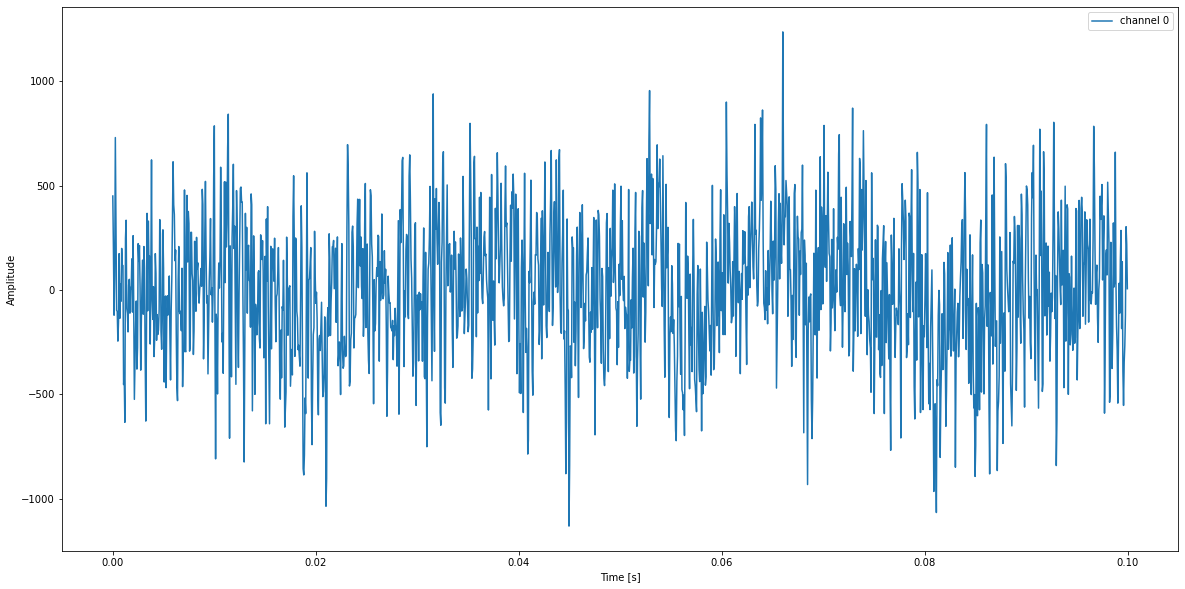

In [20]:
chunk = data.shape[0]//100 # take 1/100 second chunk

time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(20, 10))
#for i in range(8):
#    plt.plot(time[:chunk], data[:chunk, i], label="channel " + str(i)) 
plt.plot(time[:chunk], data[:chunk, 0], label="channel " + str(0))
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

The data seems really dense. Looking at either all 8 channels or just 1, the signal seems really jagged, despite the 1.6 kHz sampling rate.

## Basic Transform
Apparently spectrogram is just the general term for making a visual representation of audio.
Basic research says find a way to use FFT on these files. I also have suggestions on basic transforms from professionals.
1. FFT
2. Hilbert Transform

### FFT Spectrogram from Scipy
Compute a separate spectrogram for each channel

In [21]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [22]:
signal.spectrogram?

In [23]:
plt.pcolormesh?

The array output from the spectrogram function is only like (129, 714).  How does this work with the colormesh.
Also can I just output this as an image straight up?

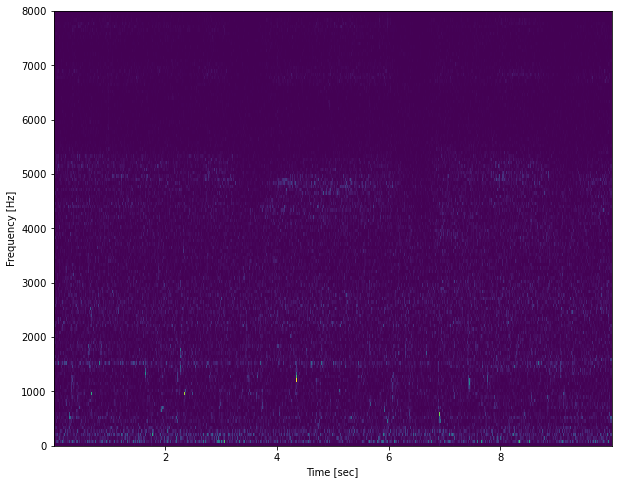

In [48]:
# freqs, time_segs, spectro_array = signal.spectrogram(data[:, 0], samplerate)
plt.figure(figsize=(10, 8))
plt.pcolormesh(time_segs, freqs, spectro_array)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### Explanation:
What does this spectrogram even mean?  I had a single high sound signal, and I decomposed it into a the frequency domain at each time step.

## Saving a Single Audio File
Want to finish the pre processing script before I use it on the cloud instance.
Script:
1. Load up each wav file
2. convert to spectrogram
3. save into new labelled directories

In [25]:
ls data

pump/  spectrograms/


In [26]:
wav_fname = "./data/file_example_WAV_1MG.wav" # get wav

In [27]:
# test the wav file, 30 seconds
from IPython.display import Audio
Audio(example_wav) # audio file length is glitchy, seems maxed out

NameError: name 'example_wav' is not defined

In [28]:
# extract the basic info
samplerate, data = sio.wavfile.read(wav_fname)
length = data.shape[0] / samplerate # samples/sample_rate = time

FileNotFoundError: [Errno 2] No such file or directory: './data/file_example_WAV_1MG.wav'

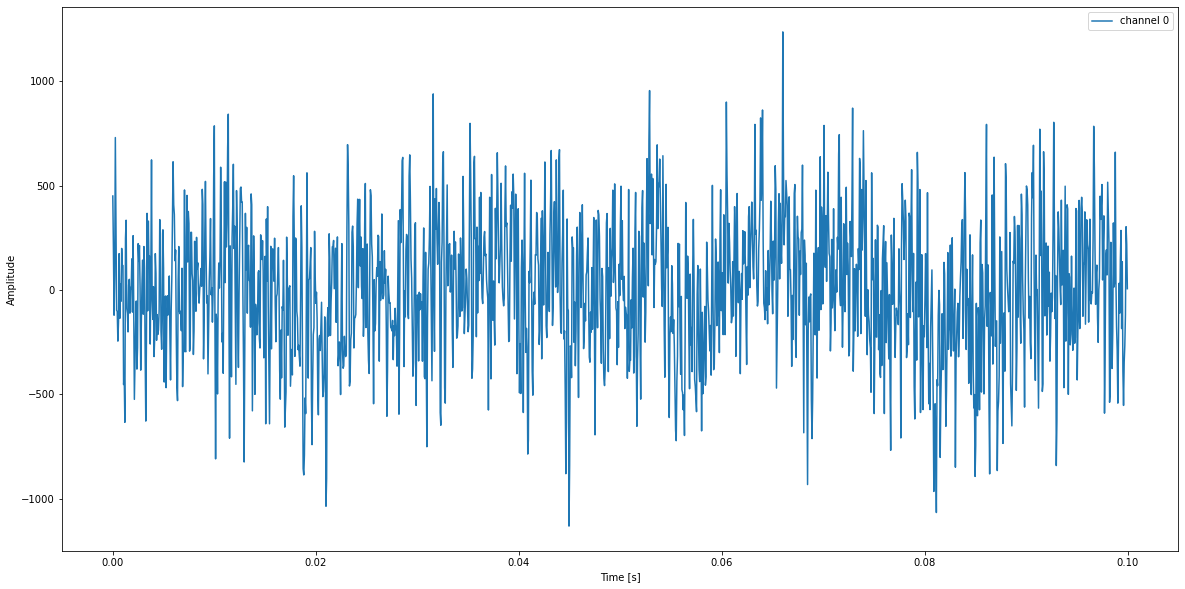

In [29]:
chunk = data.shape[0]//100 # take 1/100 second chunk

time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(20, 10))
#for i in range(8):
#    plt.plot(time[:chunk], data[:chunk, i], label="channel " + str(i)) 
plt.plot(time[:chunk], data[:chunk, 0], label="channel " + str(0))
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Text(0.5, 0, 'Time [sec]')

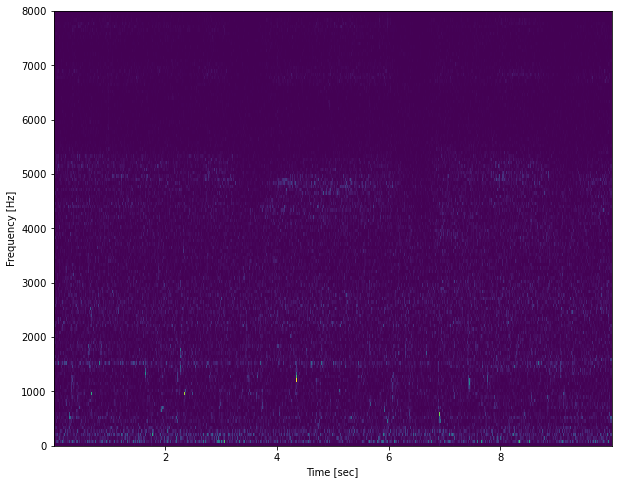

In [30]:
freqs, time_segs, spectro_array = signal.spectrogram(data[:, 0], samplerate)
plt.figure(figsize=(10, 8))
plt.pcolormesh(time_segs, freqs, spectro_array)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')`

In [35]:
spectro_array.shape

(129, 714)

why are the time_segs, freqs, and spectro_array necessary?
1. time_segs: array of sample times, shape: (1197, )
2. freqs: array of sample frequencies, shape: (129, )
3. spectro_array: the actual spectrogram, shape: (127, 1197)

This example map is way more frequency sparse, pretty sure thats normal for music.

### Saving the data after processing
- will be using with fastAI, is it worth the effort to resave as jpgs? (apparently just use png)

Need square with not ticks, no whitespace

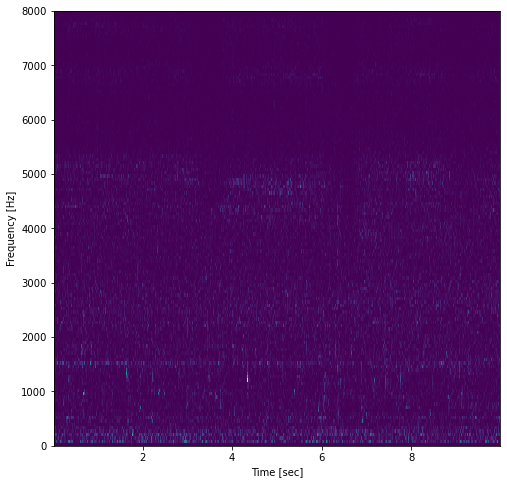

In [75]:
# save plot as png
freqs, time_segs, spectro_array = signal.spectrogram(data[:, 0], samplerate)
plt.figure(figsize=(8, 8))
plt.pcolormesh(time_segs, freqs, spectro_array)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig('image')

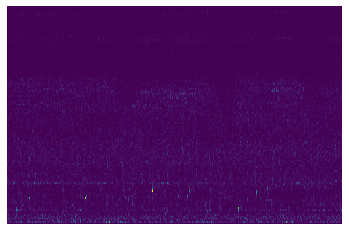

In [93]:
# save plot as png
plt.pcolormesh(time_segs, freqs, spectro_array)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('image', bbox_inches='tight', pad_inches=0)

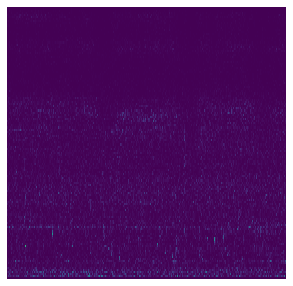

In [94]:
plt.figure(figsize=(5, 5))
fig = plt.pcolormesh(time_segs, freqs, spectro_array)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('pict.png', bbox_inches='tight', pad_inches = 0)

## Checking made spectrograms

In [95]:
ls

data/                 pre-processing-single-file.ipynb
image.png             readme.md
Model Training.ipynb  scipy-signal-processing-experiments.ipynb
pict.png              wav-to-png-script.py


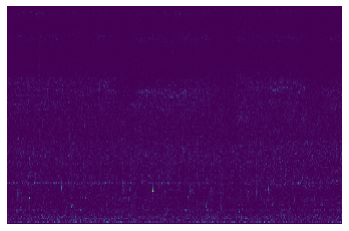

In [96]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure()
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
img=mpimg.imread('image.png')


imgplot = plt.imshow(img)